**régression linéaire avec sklearn**

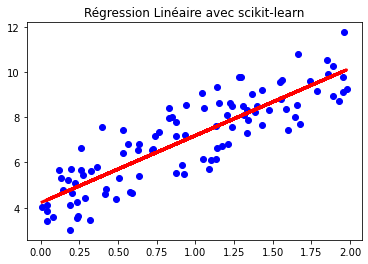

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Générer des données aléatoires
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Créer et entraîner le modèle de régression linéaire
model_lr = LinearRegression()
model_lr.fit(X, y)

# Afficher les résultats
plt.scatter(X, y, color='blue')
plt.plot(X, model_lr.predict(X), color='red', linewidth=3)
plt.title('Régression Linéaire avec scikit-learn')
plt.show()


**régression linéaire avec kéras**

Epoch 1/100
10/10 [==============================] - 0s 778us/step - loss: 56.9037
Epoch 2/100
10/10 [==============================] - 0s 667us/step - loss: 24.9263
Epoch 3/100
10/10 [==============================] - 0s 833us/step - loss: 11.2952
Epoch 4/100
10/10 [==============================] - 0s 778us/step - loss: 5.4145
Epoch 5/100
10/10 [==============================] - 0s 722us/step - loss: 2.8943
Epoch 6/100
10/10 [==============================] - 0s 722us/step - loss: 1.8075
Epoch 7/100
10/10 [==============================] - 0s 778us/step - loss: 1.3516
Epoch 8/100
10/10 [==============================] - 0s 944us/step - loss: 1.1530
Epoch 9/100
10/10 [==============================] - 0s 778us/step - loss: 1.0627
Epoch 10/100
10/10 [==============================] - 0s 889us/step - loss: 1.0247
Epoch 11/100
10/10 [==============================] - 0s 833us/step - loss: 1.0105
Epoch 12/100
10/10 [==============================] - 0s 722us/step - loss: 1.0045
Epoch 13/1

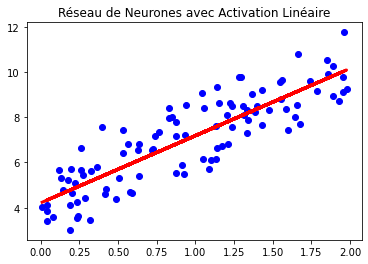

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Créer et entraîner le modèle avec Keras
model_nn_linear = Sequential()
model_nn_linear.add(Dense(units=1, input_dim=1, activation='linear'))
model_nn_linear.compile(optimizer='sgd', loss='mean_squared_error')
model_nn_linear.fit(X, y, epochs=100, batch_size=10)

# Afficher les résultats
plt.scatter(X, y, color='blue')
plt.plot(X, model_nn_linear.predict(X), color='red', linewidth=3)
plt.title('Réseau de Neurones avec Activation Linéaire')
plt.show()


4/4 [==============================] - 0s 833us/step


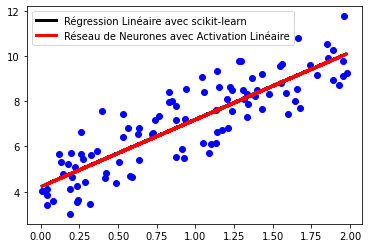

In [14]:
# Afficher les résultats
plt.scatter(X, y, color='blue')
plt.plot(X, model_lr.predict(X), color='black', linewidth=3, label='Régression Linéaire avec scikit-learn')
plt.plot(X, model_nn_linear.predict(X), color='red', linewidth=3,label='Réseau de Neurones avec Activation Linéaire')
plt.legend()


**Régression Logistique avec scikit-learn**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Générer des données aléatoires pour la classification binaire
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression logistique
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred_logistic = model_logistic.predict(X_test)

# Afficher le rapport de classification
print("Rapport de Classification - Régression Logistique :")
print(classification_report(y_test, y_pred_logistic))


Rapport de Classification - Régression Logistique :
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.92      1.00      0.96        11

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



**Réseau de Neurones avec une Neurone et Activation Sigmoid avec Keras**

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Créer et entraîner le modèle avec Keras
model_nn_sigmoid = Sequential()
model_nn_sigmoid.add(Dense(units=1, input_dim=1, activation='sigmoid'))
model_nn_sigmoid.compile(optimizer='sgd', loss='binary_crossentropy')
model_nn_sigmoid.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Faire des prédictions sur l'ensemble de test
y_prob_nn_sigmoid = model_nn_sigmoid.predict(X_test)
y_pred_nn_sigmoid = (y_prob_nn_sigmoid > 0.5).astype(int)

# Afficher le rapport de classification
print("Rapport de Classification - Réseau de Neurones avec Activation Sigmoid :")
print(classification_report(y_test, y_pred_nn_sigmoid))


1/1 [==============================] - 0s 27ms/step
Rapport de Classification - Réseau de Neurones avec Activation Sigmoid :
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.92      1.00      0.96        11

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



**Concaténer des réseaux**

In [17]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Concatenate

input_size = 10

# Définir le modèle séquentiel
model_sequential = Sequential()
model_sequential.add(Dense(64, activation='relu', input_shape=(input_size,)))
model_sequential.add(Dense(32, activation='relu'))

# Définir le modèle fonctionnel
input_functional = Input(shape=(input_size,))
dense_functional = Dense(64, activation='relu')(input_functional)
output_functional = Dense(32, activation='relu')(dense_functional)

# Concaténer les sorties des deux modèles
concatenated = Concatenate()([model_sequential.output, output_functional])

# Ajouter une couche Dense finale pour obtenir la sortie
final_output = Dense(1, activation='sigmoid')(concatenated)

# Créer le modèle global
model_combined = Model(inputs=[model_sequential.input, input_functional], outputs=final_output)

# Compiler et entraîner le modèle_combined
model_combined.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model_combined.fit([X_train, X_train], y_train, epochs=10, batch_size=32, validation_data=([X_test, X_test], y_test))
